In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!python3 --version
#python --version

Python 3.7.12


The code block below reads the tweets from google drive. put the tweet on the root folder of your G-drive

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/ml-data/Tweets.csv")
df.head()



,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.size, df.describe, 

(219600,
 <bound method NDFrame.describe of                  tweet_id  ...               user_timezone
 0      570306133677760513  ...  Eastern Time (US & Canada)
 1      570301130888122368  ...  Pacific Time (US & Canada)
 2      570301083672813571  ...  Central Time (US & Canada)
 3      570301031407624196  ...  Pacific Time (US & Canada)
 4      570300817074462722  ...  Pacific Time (US & Canada)
 ...                   ...  ...                         ...
 14635  569587686496825344  ...                         NaN
 14636  569587371693355008  ...                         NaN
 14637  569587242672398336  ...                         NaN
 14638  569587188687634433  ...  Eastern Time (US & Canada)
 14639  569587140490866689  ...                         NaN
 
 [14640 rows x 15 columns]>)

In [ ]:
df.isna().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [ ]:
df.negativereason

0                           NaN
1                           NaN
2                           NaN
3                    Bad Flight
4                    Can't Tell
                  ...          
14635                       NaN
14636    Customer Service Issue
14637                       NaN
14638    Customer Service Issue
14639                       NaN
Name: negativereason, Length: 14640, dtype: object

In [ ]:
print(df['airline_sentiment'].value_counts())
df[['text','airline_sentiment']].head()


negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


Only text, `airline`, `airline_sentiment` and `negativereason` columns are being used for our model. That's why getting rid of other columns.





In [ ]:
df=df[['text', 'airline','airline_sentiment', 'negativereason']]
df

,text,airline,airline_sentiment,negativereason
0,@VirginAmerica What @dhepburn said.,Virgin America,neutral,NaN
1,@VirginAmerica plus you've added commercials t...,Virgin America,positive,NaN
2,@VirginAmerica I didn't today... Must mean I n...,Virgin America,neutral,NaN
3,@VirginAmerica it's really aggressive to blast...,Virgin America,negative,Bad Flight
4,@VirginAmerica and it's a really big bad thing...,Virgin America,negative,Can't Tell
...,...,...,...,...
14635,@AmericanAir thank you we got on a different f...,American,positive,NaN
14636,@AmericanAir leaving over 20 minutes Late Flig...,American,negative,Customer Service Issue
14637,@AmericanAir Please bring American Airlines to...,American,neutral,NaN
14638,"@AmericanAir you have my money, you change my ...",American,negative,Customer Service Issue


Adding indicator variables for `airline_sentiment` and `negativereason` with the data set

Reference: https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

In [ ]:
airline = pd.get_dummies(df['airline'])
user_negativereason = pd.get_dummies(df['negativereason'])

df = pd.concat([df, airline, user_negativereason], axis = 1)
df.head(1)


,text,airline,airline_sentiment,negativereason,American,Delta,Southwest,US Airways,United,Virgin America,Bad Flight,Can't Tell,Cancelled Flight,Customer Service Issue,Damaged Luggage,Flight Attendant Complaints,Flight Booking Problems,Late Flight,Lost Luggage,longlines
0,@VirginAmerica What @dhepburn said.,Virgin America,neutral,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


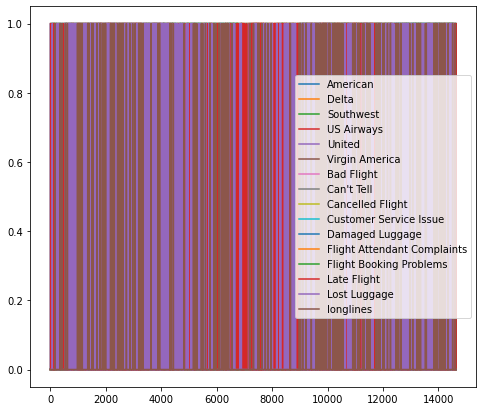

In [ ]:
df.plot(figsize=(8,7))

In [ ]:
df.airline.sum();

In [ ]:
negativereason = list(user_negativereason.columns)
airline = list(airline.columns)
airline_negativeReason = airline+negativereason
print(airline_negativeReason)

['American', 'Delta', 'Southwest', 'US Airways', 'United', 'Virgin America', 'Bad Flight', "Can't Tell", 'Cancelled Flight', 'Customer Service Issue', 'Damaged Luggage', 'Flight Attendant Complaints', 'Flight Booking Problems', 'Late Flight', 'Lost Luggage', 'longlines']


In [ ]:
import numpy as np
import re

def remove_pattern(input_txt, pattern):
  r = re.findall(pattern, input_txt)
  for i in r:
    input_txt = re.sub(i, '', input_txt) 
  return input_txt


In [ ]:
def cleanup_text(df):
  # small letter
  df['text_clean'] = df['text'].str.lower()

  #  Removing Twitter Handles (@user) 
  df['text_clean'] = np.vectorize(remove_pattern)(df['text_clean'], r"@[\w]*")

  # Removing URL
  df['text_clean'] = np.vectorize(remove_pattern)(df['text_clean'], r'^http?:\/\/.*[\r\n]*')
  df['text_clean'] = np.vectorize(remove_pattern)(df['text_clean'], r'^https?:\/\/.*[\r\n]*') 
  # Removing Punctuations, Numbers, and Special Characters
  df['text_clean'] = df['text_clean'].str.replace("[^a-zA-Z#]", " ")
  #df

# Text Cleanup start

In [ ]:
# small letter
df['text_clean'] = df['text'].str.lower()

#  Removing Twitter Handles (@user) 
df['text_clean'] = np.vectorize(remove_pattern)(df['text_clean'], r"@[\w]*")


In [ ]:
# Removing URL
df['text_clean'] = np.vectorize(remove_pattern)(df['text_clean'], r'^http?:\/\/.*[\r\n]*')
df['text_clean'] = np.vectorize(remove_pattern)(df['text_clean'], r'^https?:\/\/.*[\r\n]*') 

In [ ]:
# Removing Punctuations, Numbers, and Special Characters
df['text_clean'] = df['text_clean'].str.replace("[^a-zA-Z#]", " ")
df.tail(2)

,text,airline,airline_sentiment,negativereason,American,Delta,Southwest,US Airways,United,Virgin America,Bad Flight,Can't Tell,Cancelled Flight,Customer Service Issue,Damaged Luggage,Flight Attendant Complaints,Flight Booking Problems,Late Flight,Lost Luggage,longlines,text_clean
14638,"@AmericanAir you have my money, you change my ...",American,negative,Customer Service Issue,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,you have my money you change my flight and ...
14639,@AmericanAir we have 8 ppl so we need 2 know h...,American,neutral,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,we have ppl so we need know how many seat...


# Text Cleanup End

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import regularizers


def other_text_processing():
# tokenize

  from nltk.tokenize import TweetTokenizer
  tt = TweetTokenizer()
  df['text_tokenize'] = df['text_clean'].apply(tt.tokenize) 

  # stopwords
  import nltk
  nltk.download('stopwords')
  from nltk.corpus import stopwords

  stop_words = stopwords.words('english')

  stop_words = [i for i in stop_words if "'t" not in i and "not" not in i]
  df['text_stopwords'] = df['text_tokenize'].apply(lambda x: [item for item in x if item not in stop_words])
  #print(df['text_stopwords'])
  #df.head()


  def to_char(test_list):
    return  [ele for ele in test_list if ele is not ' ']

  df['text_char'] = df['text_clean'].apply(to_char)
  #df['text_char']

  df['word_count'] = df['text_tokenize'].str.len()
  df['char_count'] = df['text_char'].str.len()
  df.head()


  max = 0
  total_unique = 0
  all_text = []

  for twitte in df['text_stopwords']:
    if len(twitte)>max:
      max = len(twitte)
    all_text.extend(twitte)

  all_text = set(all_text)
  vocab_size = len(all_text)
  print(f'max word count of clean text: {max}\ntotal unique words after cleaning: {vocab_size}')




  max_words = vocab_size
  max_len = max

  tokenizer = Tokenizer(num_words=max_words)
  tokenizer.fit_on_texts(df['text_stopwords'].values)

  #len(tokenizer.index_word )
  #tokenizer


  max_char = 0
  all_char = []
  for i in df['text_clean']:
    if len(i)>max_char:
      max_char = len(i)
    all_char.extend(set(i))

  char_vocab_size = len(set(all_char))

  print(f'max vocab for char apporach {char_vocab_size}\nmax char {max_char}')

  from keras.preprocessing.text import Tokenizer

  max_words2 = char_vocab_size
  max_len2 = max_char

  tokenizer2 = Tokenizer(num_words=max_words2)
  tokenizer2.fit_on_texts(df['text_char'].values)


In [ ]:
# tokenize

from nltk.tokenize import TweetTokenizer
tt = TweetTokenizer()
df['text_tokenize'] = df['text_clean'].apply(tt.tokenize)


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

stop_words = [i for i in stop_words if "'t" not in i and "not" not in i]
df['text_stopwords'] = df['text_tokenize'].apply(lambda x: [item for item in x if item not in stop_words])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def to_char(test_list):
  return  [ele for ele in test_list if ele is not ' ']

df['text_char'] = df['text_clean'].apply(to_char)
#df['text_char']

In [ ]:
df['word_count'] = df['text_tokenize'].str.len()
df['char_count'] = df['text_char'].str.len()
df.head()

,text,airline,airline_sentiment,negativereason,American,Delta,Southwest,US Airways,United,Virgin America,Bad Flight,Can't Tell,Cancelled Flight,Customer Service Issue,Damaged Luggage,Flight Attendant Complaints,Flight Booking Problems,Late Flight,Lost Luggage,longlines,text_clean,text_tokenize,text_stopwords,text_char,word_count,char_count
0,@VirginAmerica What @dhepburn said.,Virgin America,neutral,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,what said,"[what, said]",[said],"[w, h, a, t, s, a, i, d]",2,8
1,@VirginAmerica plus you've added commercials t...,Virgin America,positive,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,plus you ve added commercials to the experien...,"[plus, you, ve, added, commercials, to, the, e...","[plus, added, commercials, experience, tacky]","[p, l, u, s, y, o, u, v, e, a, d, d, e, d, c, ...",9,45
2,@VirginAmerica I didn't today... Must mean I n...,Virgin America,neutral,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,i didn t today must mean i need to take an...,"[i, didn, t, today, must, mean, i, need, to, t...","[today, must, mean, need, take, another, trip]","[i, d, i, d, n, t, t, o, d, a, y, m, u, s, t, ...",12,41
3,@VirginAmerica it's really aggressive to blast...,Virgin America,negative,Bad Flight,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,it s really aggressive to blast obnoxious en...,"[it, s, really, aggressive, to, blast, obnoxio...","[really, aggressive, blast, obnoxious, enterta...","[i, t, s, r, e, a, l, l, y, a, g, g, r, e, s, ...",17,90
4,@VirginAmerica and it's a really big bad thing...,Virgin America,negative,Can't Tell,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,and it s a really big bad thing about it,"[and, it, s, a, really, big, bad, thing, about...","[really, big, bad, thing]","[a, n, d, i, t, s, a, r, e, a, l, l, y, b, i, ...",10,31


In [ ]:
max = 0
total_unique = 0
all_text = []

for twitte in df['text_stopwords']:
  if len(twitte)>max:
    max = len(twitte)
  all_text.extend(twitte)

all_text = set(all_text)
vocab_size = len(all_text)
print(f'max word count of clean text: {max}\ntotal unique words after cleaning: {vocab_size}')

# change vocab size
# vocab_size = 10000

max word count of clean text: 23
total unique words after cleaning: 13210


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import regularizers

max_words = vocab_size
max_len = max

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['text_stopwords'].values)

#len(tokenizer.index_word )
#tokenizer

In [ ]:
max_char = 0
all_char = []
for i in df['text_clean']:
  if len(i)>max_char:
    max_char = len(i)
  all_char.extend(set(i))

char_vocab_size = len(set(all_char))

print(f'max vocab for char apporach {char_vocab_size}\nmax char {max_char}')

max vocab for char apporach 28
max char 176


In [ ]:
from keras.preprocessing.text import Tokenizer

max_words2 = char_vocab_size
max_len2 = max_char

tokenizer2 = Tokenizer(num_words=max_words2)
tokenizer2.fit_on_texts(df['text_char'].values)


In [ ]:
from sklearn.model_selection import train_test_split

trainX, testX, trainY, testY = train_test_split(df['text_stopwords'], df['airline_sentiment'], test_size=.2)
print(f'train data shape :{trainX.shape}\ntest data shape:{testX.shape}')

train data shape :(11712,)
test data shape:(2928,)


In [ ]:
all = airline_negativeReason+['word_count','char_count']
print (all)
len(all)

['American', 'Delta', 'Southwest', 'US Airways', 'United', 'Virgin America', 'Bad Flight', "Can't Tell", 'Cancelled Flight', 'Customer Service Issue', 'Damaged Luggage', 'Flight Attendant Complaints', 'Flight Booking Problems', 'Late Flight', 'Lost Luggage', 'longlines', 'word_count', 'char_count']


18

`TfidfVectorizer` Need to look into it

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer(stop_words=stop_words,max_features=1000)
x = v.fit_transform(df['text_clean'])
print(x)
print(x.size)
type(x)

#x[trainX.index].toarray()
#trainX.index


  (0, 748)	1.0
  (1, 290)	0.46969517618639717
  (1, 10)	0.6690510018068798
  (1, 666)	0.5759836789774861
  (2, 896)	0.363973182340566
  (2, 37)	0.34635681595455964
  (2, 844)	0.34713887390774606
  (2, 585)	0.298124399936757
  (2, 542)	0.4532328675727263
  (2, 581)	0.4831414188093875
  (2, 878)	0.3151686217658198
  (3, 505)	0.5469482477364942
  (3, 35)	0.35792928508789995
  (3, 272)	0.6294711757340604
  (3, 702)	0.4201193641031357
  (4, 862)	0.5490738236536844
  (4, 81)	0.4683661750738641
  (4, 93)	0.5466637636815684
  (4, 702)	0.42462900478241394
  (5, 340)	0.31249761531796605
  (5, 761)	0.34301639209541585
  (5, 325)	0.1586015129548656
  (5, 641)	0.36769503418154564
  (5, 987)	0.27768410361472656
  (5, 774)	0.39967758793643615
  :	:
  (14636, 489)	0.31354956570608067
  (14636, 121)	0.28544027105135483
  (14636, 325)	0.24784785521882827
  (14637, 33)	0.5407162989774352
  (14637, 108)	0.5834401167961911
  (14637, 20)	0.4796108624779139
  (14637, 664)	0.3704010457952073
  (14638, 651)	0.

scipy.sparse.csr.csr_matrix

In [ ]:
trainX.head()

5079     [gotta, new, record, hrs, air, hrs, waiting, b...
12017    [going, reported, police, due, sexual, assult,...
1702     [bag, state, travel, airports, fly, looks, lik...
9143     [thank, reaching, hopefully, request, fixed, r...
14216    [flight, cancelled, flightled, website, says, ...
Name: text_stopwords, dtype: object

In [ ]:
# CNN
trainX2 = df.iloc[trainX.index][all].values
testX2 = df.iloc[testX.index][all].values




In [ ]:
trainX2 = np.hstack((trainX2, x[trainX.index].toarray()))
testX2 = np.hstack((testX2, x[testX.index].toarray()))
print(testX2.size)
print(testX2[0].size)

2980704
1018


In [ ]:
# for DNN
# string to neumerical value
trainX = tokenizer.texts_to_sequences(trainX)
testX = tokenizer.texts_to_sequences(testX)

print(trainX[0])
# padding
trainX = pad_sequences(trainX, maxlen=max_len)
testX = pad_sequences(testX, maxlen=max_len)
print(trainX[0])

[1202, 72, 607, 55, 173, 55, 40, 70, 642, 381]
[   0    0    0    0    0    0    0    0    0    0    0    0    0 1202
   72  607   55  173   55   40   70  642  381]


In [ ]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
lb.fit(trainY)

print(lb.classes_)
print(testY)

trainY = lb.transform(trainY)
testY = lb.transform(testY)
print(testY)

['negative' 'neutral' 'positive']
1831     negative
8081     negative
12774     neutral
8105     positive
8668     positive
           ...   
6831     positive
2607     negative
9033     negative
2374     positive
2556     positive
Name: airline_sentiment, Length: 2928, dtype: object
[[1 0 0]
 [1 0 0]
 [0 1 0]
 ...
 [1 0 0]
 [0 0 1]
 [0 0 1]]


In [ ]:
trainX.shape , trainX2.shape

((11712, 23), (11712, 1018))

In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
from keras import layers
from keras.layers import Concatenate
from keras.models import Sequential
from keras.models import Model

n_unique_words = vocab_size
maxlen = max
batch_size = 200
embedding_dim = 128

CONCATE_LAYER = 50
## dense layers:5
DNN = Sequential(name='DNN')
DNN.add(layers.Dense(800, input_dim=trainX2.shape[1], activation='relu'))
DNN.add(layers.Dense(800, activation='relu'))
DNN.add(layers.Dropout(0.3))
DNN.add(layers.Dense(600, activation='relu'))
DNN.add(layers.Dropout(0.3))
DNN.add(layers.Dense(200, activation='relu'))
# DNN.add(layers.Embedding(n_unique_words, embedding_dim, input_length=maxlen))
# DNN.add(layers.Bidirectional(layers.LSTM(64)))
# DNN.add(layers.Dropout(0.5))

DNN.add(layers.Dense(CONCATE_LAYER, activation='relu'))

## Conv1D: 3 layers ; all relu
## Dense : 2
## 

CNN = Sequential(name='CNN')
CNN.add(layers.Embedding(n_unique_words, embedding_dim, input_length=max_len))
CNN.add(layers.Conv1D(128, 3, activation='relu'))
CNN.add(layers.MaxPool1D())
CNN.add(layers.Conv1D(128, 3, activation='relu'))
CNN.add(layers.MaxPool1D())
CNN.add(layers.Conv1D(128, 3, activation='relu'))
CNN.add(layers.GlobalMaxPooling1D())
CNN.add(layers.Dense(CONCATE_LAYER, activation='relu'))

merge = Concatenate()([DNN.output, CNN.output])
output = layers.Dense(3, activation = 'softmax')(merge)


conc_model = Model([DNN.input, CNN.input], output, name="DNN_CNN")
conc_model.summary()

## model.compile() : configure the model with loss, optimizer, metrics 
## model.fit()     : train the model with 
## model.predict() : Use model to perform predictions
conc_model.compile(optimizer='adam', 
                  loss='categorical_crossentropy',
                  metrics=['accuracy', precision_m])

Model: "DNN_CNN"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 embedding_input (InputLayer)   [(None, 23)]         0           []                               
                                                                                                  
 dense_input (InputLayer)       [(None, 1018)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, 23, 128)      1690880     ['embedding_input[0][0]']        
                                                                                                  
 dense (Dense)                  (None, 800)          815200      ['dense_input[0][0]']            
                                                                                            

In [ ]:
# conc_model.fit()
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_precision_m', patience=5)]

In [ ]:
%%time
epochs = 100
history = conc_model.fit([trainX2, trainX], trainY,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=([testX2, testX], testY),
                    verbose=1,
                    callbacks=callbacks)

Epoch 1/100
59/59 [==============================] - 17s 18ms/step - loss: 0.8620 - accuracy: 0.6287 - precision_m: 0.7102 - val_loss: 0.7387 - val_accuracy: 0.6318 - val_precision_m: 0.8188 - lr: 0.0010
Epoch 2/100
59/59 [==============================] - 1s 9ms/step - loss: 0.6027 - accuracy: 0.7429 - precision_m: 0.8544 - val_loss: 0.6347 - val_accuracy: 0.7336 - val_precision_m: 0.8169 - lr: 0.0010
Epoch 3/100
59/59 [==============================] - 1s 10ms/step - loss: 0.4163 - accuracy: 0.8376 - precision_m: 0.8694 - val_loss: 0.6255 - val_accuracy: 0.7490 - val_precision_m: 0.7656 - lr: 0.0010
Epoch 4/100
59/59 [==============================] - 1s 10ms/step - loss: 0.2531 - accuracy: 0.9016 - precision_m: 0.9155 - val_loss: 0.5571 - val_accuracy: 0.8067 - val_precision_m: 0.8176 - lr: 0.0010
Epoch 5/100
59/59 [==============================] - 1s 9ms/step - loss: 0.1006 - accuracy: 0.9620 - precision_m: 0.9660 - val_loss: 0.3430 - val_accuracy: 0.8900 - val_precision_m: 0.8914

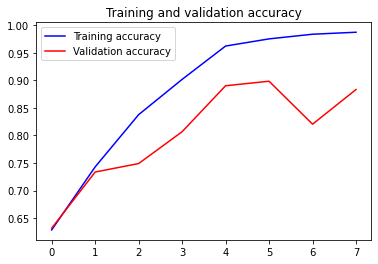

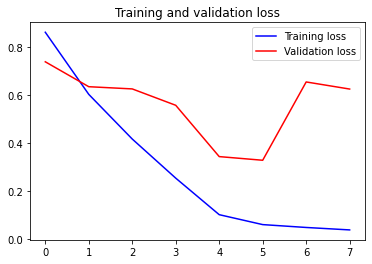

In [ ]:
# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(accuracy))
 
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [ ]:
from sklearn.metrics import classification_report

y_pred = conc_model.predict([testX2, testX])
print(classification_report(lb.inverse_transform(testY), lb.inverse_transform(y_pred)))

              precision    recall  f1-score   support

    negative       0.93      1.00      0.96      1778
     neutral       0.76      0.78      0.77       638
    positive       0.87      0.60      0.71       512

    accuracy                           0.88      2928
   macro avg       0.85      0.80      0.82      2928
weighted avg       0.88      0.88      0.88      2928



In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax




In [ ]:
def convert_to_array_result(y):
  y_pred_array = np.zeros(y.shape[0])

  # Find class with highest probability
  for i in range(0, y.shape[0]):
      label_predict = np.argmax(y[i]) # column with max probability
      y_pred_array[i] = label_predict

  # convert to integers
  y_pred_array = y_pred_array.astype(int)
  return y_pred_array

Confusion matrix, without normalization
[[1778    0    0]
 [  91  499   48]
 [  49  154  309]]


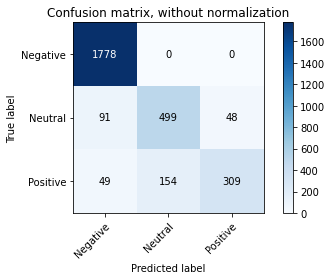

In [ ]:
classNames=np.array(['Negative', 'Neutral', 'Positive']);
plot_confusion_matrix(convert_to_array_result(testY), convert_to_array_result(y_pred), classes=classNames)
#print(testY.shape)
#print (y_pred.shape)
test=convert_to_array_result(testY)
#print(test)

Random tweet check using the model

In [ ]:
def cleanup_text_d(df):
	df['text_clean'] = df['text'].str.lower()
	df['text_clean'] = np.vectorize(remove_pattern)(df['text_clean'], r"@[\w]*")
	df['text_clean'] = np.vectorize(remove_pattern)(df['text_clean'], r'^http?:\/\/.*[\r\n]*')
	df['text_clean'] = np.vectorize(remove_pattern)(df['text_clean'], r'^https?:\/\/.*[\r\n]*') 
	df['text_clean'] = df['text_clean'].str.replace("[^a-zA-Z#]", " ")
	tt = TweetTokenizer()
	df['text_tokenize'] = df['text_clean'].apply(tt.tokenize)
	stop_words = stopwords.words('english')

	stop_words = [i for i in stop_words if "'t" not in i and "not" not in i]
	df['text_stopwords'] = df['text_tokenize'].apply(lambda x: [item for item in x if item not in stop_words])
	df['text_char'] = df['text_clean'].apply(to_char)
	df['word_count'] = df['text_tokenize'].str.len()
	df['char_count'] = df['text_char'].str.len()
	
	tokenizer = Tokenizer(num_words=max_words)
	tokenizer.fit_on_texts(df['text_stopwords'].values)
	
	return df['text_stopwords']


tweet="@VirginAmerica Thanks for a wonderfully pleasant trip tonight."
tweetd = [{'text': tweet}]
t_df = pd.DataFrame(tweetd)
randomX  = cleanup_text_d(t_df)
randomX2 = df.iloc[randomX.index][all].values
randomX2 = np.hstack((randomX2, x[randomX.index].toarray()))

randomX = tokenizer.texts_to_sequences(randomX)
randomX = pad_sequences(randomX, maxlen=max_len)

prediction=conc_model([randomX2,randomX])
print(prediction)

tf.Tensor([[2.0151807e-04 2.4417851e-02 9.7538066e-01]], shape=(1, 3), dtype=float32)


In [ ]:
# conc_model.save("/content/drive/My Drive/Colab Notebooks/sentimentModel")

In [ ]:
  result=prediction[0][0]
  for i in range(0, 3):
      if result>prediction[0][i]:
        result=prediction[0][i]
      print(prediction[0][i])
      print(i) # column with max probability
  print(result)

tf.Tensor(0.00020151807, shape=(), dtype=float32)
0
tf.Tensor(0.024417851, shape=(), dtype=float32)
1
tf.Tensor(0.97538066, shape=(), dtype=float32)
2
tf.Tensor(0.00020151807, shape=(), dtype=float32)
